# Lineare Regression

*Stelle sicher, dass Du das Video zur Linearen Regression gesehen hast und Kapitel 2 und 3 des ISLR Buchs gelesen hast, bevor Du fortfährst.*

Denke während der Lektion daran, dass Lineare Regression zu den "Supervised Learning" Algorithmen gehört. Wir werden einige der folgende Konzepte betrachten:

* Daten erhalten
* Explorative Datenanalyse (EDA)
* Unsere Daten bereinigen
* Review der Model Form
* Trainings- und Testgruppen
* Lineare Regressionsmodell
___
## Daten erhalten

Wir werden einen Datensatz über die [Leistungen von Studenten](https://archive.ics.uci.edu/ml/datasets/Student+Performance) verwenden. Downloade den Datensatz oder verwende einfach die .csv-Datei, die wir im Repository bereitstellen. Wir werden insbesondere die Studenten der Mathematik (student-mat.csv) anschauen. Achtet beim Einlesen darauf, dass das Trennzeichen ein Semikolon ist!

In [1]:
df <- read.csv("student-mat.csv",sep=";")

In [2]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
summary(df)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

### Informationen zu den Spalten

Hier ist eine Übersicht der Informationen, die unsere vorliegenden Spalten beinhalten:

* 1 school - Die Schule des Studenten (binär: 'GP' - Gabriel Pereira oder 'MS' - Mousinho da Silveira) 
* 2 sex - Geschlecht des Studenten (binär: 'F' - weiblich oder 'M' - männlich) 
* 3 age - Alter des Studenten (numerisch: von 15 bis 22) 
* 4 address - Art der Adresse des Studenten (binär: 'U' - städtisch oder 'R' - ländlich) 
* 5 famsize - Familiengröße (binär: 'LE3' - kleiner oder gleich zu 3 oder 'GT3' - größer als 3) 
* 6 Pstatus - Wohnsituation der Eltern (binär: 'T' - zusammen lebend oder 'A' - getrennt) 
* 7 Medu - Bilder der Mutter (numerisch: 0 - keine, 1 - primäre Bildung (4. Klasse), 2 - 5. bis 9. Klasse, 3 -  Sekundäre Bildung oder 4 - höhere Bildung) 
* 8 Fedu - Bilder dee Vaters (numerisch: 0 - keine, 1 - primäre Bildung (4. Klasse), 2 - 5. bis 9. Klasse, 3 -  Sekundäre Bildung oder 4 - höhere Bildung) 
* 9 Mjob - Beruf der Mutter (nominal: 'teacher', 'health', 'services' (z.B. Beamte), 'at_home' oder 'other') 
* 10 Fjob - Beruf des Vaters (nominal: 'teacher', 'health', 'services' (z.B. Beamte), 'at_home' oder 'other')  
* 11 reason - Grund der Schulauswahl (nominal: 'home' - nahe am Zuhause, 'reputation' - Ruf der Schule, 'course' - Kursauswahl oder 'other' - anderer Grund) 
* 12 guardian - "Guradian" des Studenten (nominal: 'mother', 'father' oder 'other') 
* 13 traveltime - Wegzeit von Zuhause zur Schule (numerisch: 1 - weniger als 15 min., 2 - 15 bis 30 min., 3 - 30 min. bis 1 Stunde, oder 4 - mehr als 1 Stunde) 
* 14 studytime - Wöchtenliches Zeitinvestment zum Lernen (numerisch: 1 - weniger als 2 Stunden, 2 - 2 bis 5 Stunden, 3 - 5 bis 10 Stunden, or 4 - mehr als 10 Stunden) 
* 15 failures - Anzahl der nicht bestandenen Kurse bisher (numerisch: n falls zwischen 1 und 3 , sonst 4) 
* 16 schoolsup - Gibt es zusätzlichen Bildungssupport (binär: yes oder no) 
* 17 famsup - Gibt es familiären Bildungssupport (binär: yes oder no) 
* 18 paid - Zusätzlich gezahlte Klassen innerhalb des Fachs (Mathe oder Portugiesisch) (binär: yes oder no)  
* 19 activities - Außerschulische Aktivitäten ((binär: yes oder no)  
* 20 nursery - Hat die "nursery" Schule besucht (binär: yes oder no)  
* 21 higher - Strebt höhere Bildung an (binär: yes oder no)  
* 22 internet - Internetzugang zuhause (binär: yes oder no)  
* 23 romantic - Mit romatischer Beziehung (binär: yes oder no)  
* 24 famrel - Qualität der familiären Beziehungen (numerisch: von 1 - sehr schlecht bis 5 - exzellent) 
* 25 freetime - Freizeit nach der Schule (numerisch: von 1 - sehr schlecht bis 5 - exzellent)  
* 26 goout - Geht mit Freunden aus (numerisch: von 1 - sehr schlecht bis 5 - exzellent) 
* 27 Dalc - Alkoholkonsum an Arbeitstagen (numerisch: von 1 - sehr schlecht bis 5 - exzellent) 
* 28 Walc - Alkoholkonsum am Wochenende (numerisch: von 1 - sehr schlecht bis 5 - exzellent) 
* 29 health - Aktuelle Gesundheit (numerisch: von 1 - sehr schlecht bis 5 - exzellent) 
* 30 absences - Anzahl an Fehltagen (numerisch: von 0 bis 93) 

Diese Noten beziehen sich auf den Kurs:

* 31 G1 - Note des ersten Halbjahrs (numerisch: von 0 bis 20) 
* 31 G2 - Note des zweiten Halbjahrs (numerisch: von 0 bis 20)
* 32 G3 - Abschlussnote (numerisch: von 0 bis 20) <- Unser Output Ziel

## Daten bereinigen

Als nächstes sollten wir unsere Daten bereinigen. Dieser Datensatz liegt uns tatsächlich schon bereinigt vor. Trotzdem eine Übersicht der Schritte, die sich für andere Datensätze anbieten:

### Auf NA Werte prüfen

Schauen wir nach, ob wir hier irgendwelche NA Werte haben:

In [4]:
any(is.na(df))

[1] FALSE

Toll! Die meisten echten Datensätze werden NA oder Null Werte beinhalten, es ist alles immer ratsam dies zu überprüfen. Dabei ist es dir überlassen, wie du damit umgehst. Du kannst die Einträge ausschließen, wenn es zu viele sind, oder andere Werte einfügen, wie z.B. Durchschnitte.

### Kategorische Eigenschaften

Wenn wir fortfahren sollten wir sicherstellen, dass kategorische Variablen als `factor` eingestellt sind. Zum Beispiel ist die `MJob` Spalte eine, die Kategorien von Jobs angibt, nicht numerische Werte von 1 bis 5. R ist sehr gut darin solche Werte zu erkennen und nimmt uns meisten den Großteil der Arbeit ab. Denke dabei aber immer daran, `factor()` als Möglichkeit im Hinterkopf zu haben. Glücklicherweise ist dies grundsätzlich schon erledigt. Wir können es schnell überprüfen:

In [5]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

## Explorative Datenanalyse
Wir können *ggplot2* verwenden, um die Daten etwas zu erforschen. Du kannst diese Sektion gerne noch erweitern.

In [6]:
library(ggplot2)
library(ggthemes)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Korrelation und CorrPlots

Wikipedia gibt folgende Definition für Korrelation:

*"Eine Korrelation (mittellat. correlatio für „Wechselbeziehung“) beschreibt eine Beziehung zwischen zwei oder mehreren Merkmalen, Ereignissen, Zuständen oder Funktionen. Zwischen Merkmalen, Ereignissen oder Zuständen braucht keine kausale Beziehung zu bestehen: manche Elemente eines Systems beeinflussen sich gegenseitig nicht; oder es besteht eine stochastische (= vom Zufall beeinflusste) Beziehung zwischen ihnen."*

`CorrPlots` sind eine großartige Möglichkeit Daten zu untersuchen und festzustellen, ob Korrelationen vorliegen. Beginnen wir damit, nur die numerischen Daten zu wählen:

In [7]:
# Nur numerische Daten wählen
num.cols <- sapply(df, is.numeric)

# Filtert die numerischen Werte für Korrelationen
cor.data <- cor(df[,num.cols])

cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


Obwohl das schon hervorragende Daten sind ist es schwer sie komplett zu fassen. Dabei kann uns eine Visualisierung helfen. 

Es gibt viele tolle Drittanbieter Packages, um dies zu tun. Wir können das *corrgram* Package wählen und installieren. Es werden außerdem die notwendigen Dependecies installiert.

In [8]:
#install.packages('corrgram',repos = 'http://cran.us.r-project.org')
#install.packages('corrplot',repos = 'http://cran.us.r-project.org')
#install.packages('viridisLite',repos = 'http://cran.us.r-project.org')

In [9]:
library(corrplot)
library(viridisLite)
library(corrgram)

corrplot 0.84 loaded
Warning message:
“package ‘viridisLite’ was built under R version 3.4.3”

Beginnen wir damit, *corrplot* zu verwenden, das am weitesten verbreitete. Diese englische [Dokumentation](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) verrät einem viele nützliche Infos um Package.

In [10]:
#help(corrplot)

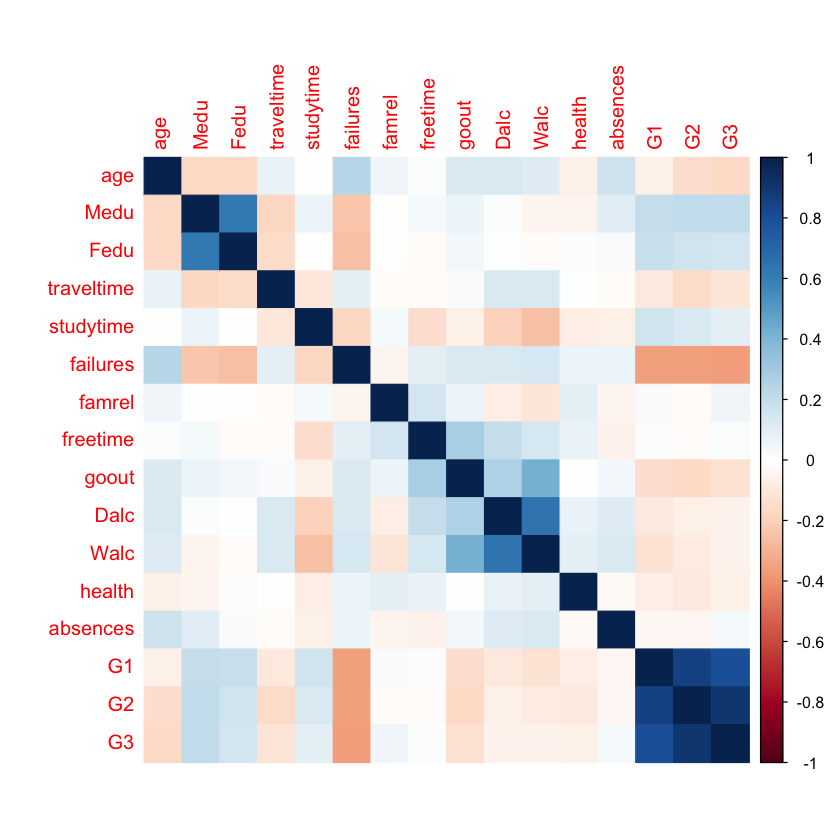

In [11]:
corrplot(cor.data,method='color')

Offensichtlich haben wir eine hohe Korrelation zwischen G1, G2 und G3, was irgendwo Sinne ergibt, da das alles Noten der Studenten sind. Gute Studenten sind in jeder Periode gut und schlechtere Studenten ebenso. Außerdem gibt es eine negative Korrelation zwischen G1-3 und `failure`. 

Außerdem ist die Bildung von Vater und Mutter korreliert, was ebenso Sinn ergibt.

Wir können außerdem *corrgram* verwenden, was es uns erlaubt diese Art an Visualisierungen direkt zu erzeugen, indem wir den Dataframe übergeben. Auch hier kann die [Dokumentation](https://cran.r-project.org/web/packages/corrgram/index.html) zum weiteren Verständnis beitragen.

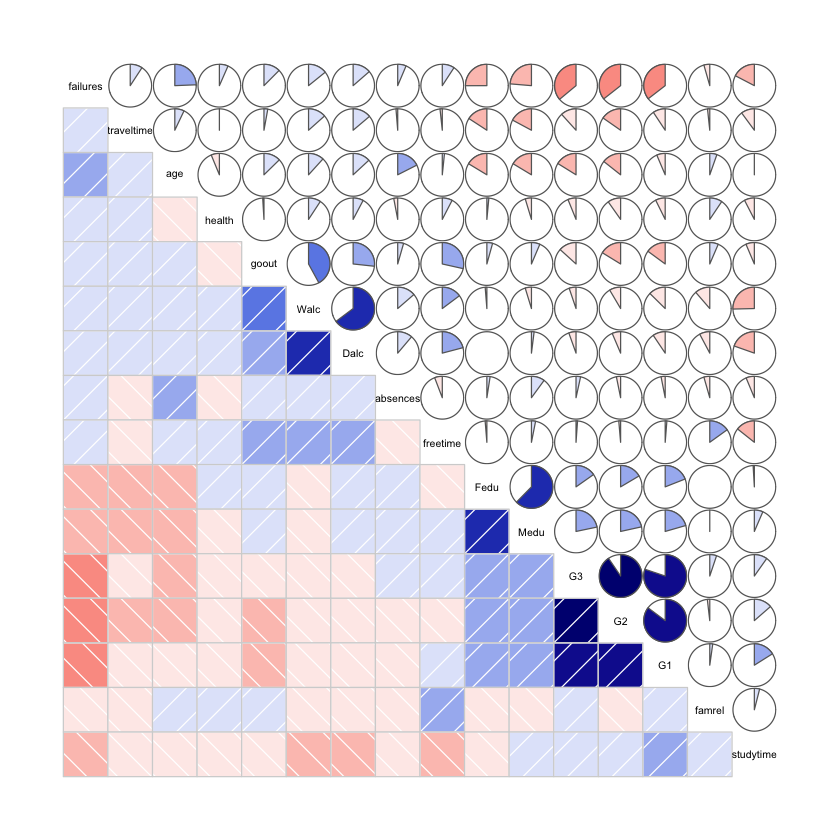

In [12]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)

Da wir letztlich versuchen werden den G3 Score vorherzusagen sollten wir uns einmal ein Histogramm seiner Verteilung anschauen:

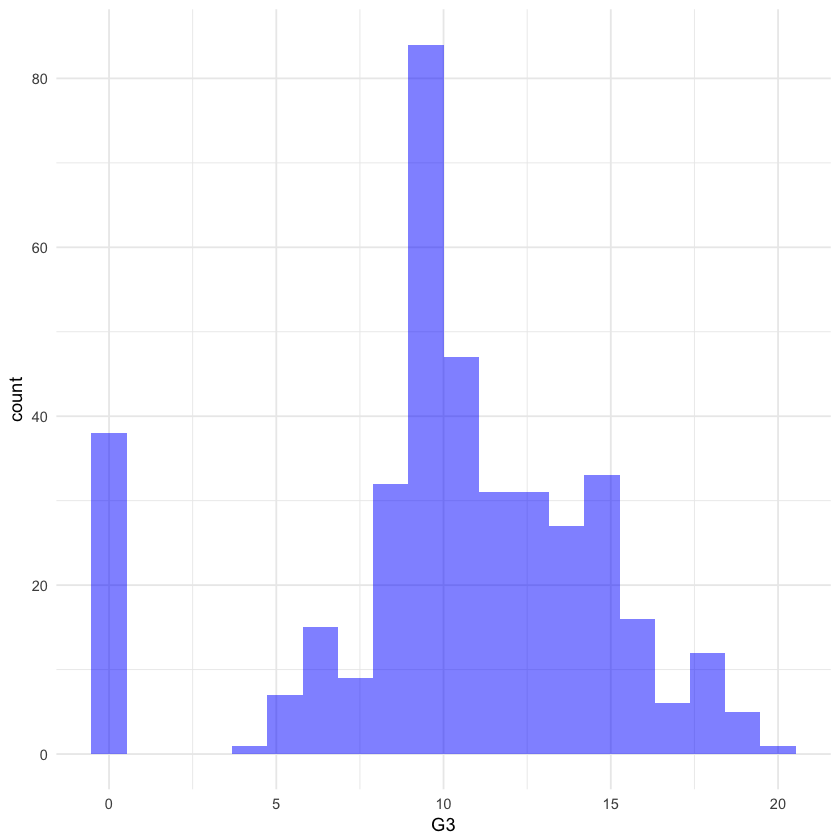

In [13]:
ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

## Ein Modell aufsetzen

### Allgemeine Form

Die allgemeine Form wie ein Modell für eine Lineare Regression in R aufgebaut wird sieht wie folgt aus:

    lm <- lm(y - x1 + x2, data)
    
    oder um alle Eigenschaften aus den Daten zu verwenden
    
    model <- lm(y~. , data)
    
### Trainings- und Testdaten

Wir müssen unsere Daten in Trainings- und Testdaten aufteilen, um die Genauigkeit unsers Modells überprüfen zu können. Dabei hilft uns die *caTools* Library:

In [14]:
# Library importieren
library(caTools)

# Einen Zufalls"seed" festlegen, damit eure "zufälligen" Daten 
# die selben wie in diesem Beispiel sind
set.seed(101)

# Die Daten aufteilen
sample <- sample.split(df$age, SplitRatio = 0.70)

# Trainignsdaten
train = subset(df, sample == TRUE)

# Testdaten
test = subset(df, sample == FALSE)

*Für das Sample haben wir technisch gesehen einen Boolean-Wert festgelegt, auf den wir uns dann in den Subsets beziehen.*

### Das Modell trainieren

Jetzt können wir die Trainingsdaten nutzen, um unser Modell zu trainieren. Anschließend schauen wir uns eine Summary für das Modell an.

In [15]:
model <- lm(G3 ~ .,train)

In [16]:
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7681 -0.6423  0.2294  1.0691  4.5942 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.329568   2.474569  -0.537 0.591574    
schoolMS          0.838581   0.470545   1.782 0.076016 .  
sexM              0.034883   0.275586   0.127 0.899382    
age              -0.214994   0.119579  -1.798 0.073472 .  
addressU          0.067190   0.326035   0.206 0.836905    
famsizeLE3       -0.111068   0.283228  -0.392 0.695302    
PstatusT         -0.153653   0.401679  -0.383 0.702417    
Medu              0.279949   0.171111   1.636 0.103164    
Fedu             -0.221275   0.151103  -1.464 0.144422    
Mjobhealth        0.002065   0.610532   0.003 0.997304    
Mjobother         0.509947   0.403195   1.265 0.207209    
Mjobservices      0.475476   0.435332   1.092 0.275857    
Mjobteacher       0.285345   0.550640   0.518 0.604802    
Fjobhealth        0.433

## Modell Interpretation

Das Verständnis des Modells und seiner Güte erfordert einige Grundlagen in Statistik. Wikipedia kann bei den Details sehr gut weiterhelfen. Ebenso das ISLR Buch. Eine grobe Übersicht zum Verständnis der Summary gibt es hier:

<table class="definitions">
	<tr>
		<th>#</th>
		<th>Englischer Ausdruck</th>
        <th>Name</th>
		<th>Beschreibung</th>
	</tr>
	<tr>
		<td id="residuals">1</td>
		<td>Residuals</td>
        <td>Residuen</td>
		<td>Die Residuen sind die Differenz zwischen den tatsächlichen Werten einer Variablen und den vorhergesagten Werten aus der Regression: <code>y - &ycirc;</code>. Für die meisten Regressionen sollen die Residuen normalverteilt sein, wenn man ihre Verteilung plottet. Wenn die Residuen normalverteilt sind deutet dies an, dass wir sowohl über- als auch unterschätzen. Und es deutet an, dass wir im Durchschnitt eine Differenz von 0 haben (was gut ist). Außerdem nimmt die Wahrscheinlichkeit davon sehr weit daneben zu schätzen ab, je größer die Distanz zum tatsächlichen Wert ist.<br><br>Wir können uns das wie eine Dartscheibe vorstellen. Ein gutes Modell wird das Bullseye manchmal treffen (aber nicht immer). Wenn es nicht das Bullseye trifft, dann trifft es alle andern Richtungen gleich oft (nicht nur über das Bullseye). Und es trifft häufiger nahe am Bullseye als außen an der Dartscheibe.</td>
	</tr>
	<tr>
		<td>2</td>
		<td>Significance Stars</td>
        <td>Signifikanz Sterne</td>
		<td>Die Sterne sind eine Abkürzung für das Signifikanzniveau, mit der Anzahl an Sternchen als Entsprechung des berechneten p-Wertes. <code>***</code> für eine hohe Signifikanz und <code>*</code> für eine niedrige. In diesem Fall bedeuten die <code>***</code>, dass es unwahrscheinlich ist, dass keine Beziehung zwischen Abwesenheit und G3 besteht.</td>
	</tr>
	<tr>
		<td>3</td>
		<td>Estimated Coeffecient</td>
        <td>Geschätzter Koeffizient</td>
		<td>Der geschätzte Koeffizient ist der Wert, der die berechnete Steigung angibt, die die Regression ergeben hat. Es könnte ein wenig verwirrend sein, dass der Achsenabschnitt auch einen Wert hat, aber man kann ihn sich als Steigung vorstellen, die immer mit 1 multipliziert wird. Die Nummer wird offensichtlich immer mit der Ausprägung der Variablen variieren, die man in die Regression einspielt. Es ist aber immer gut sich einmal die reinen Werte anzuschauen und auf Plausibilität zu überprüfen.</td>
	</tr>
	<tr>
		<td>4</td>
		<td>Standard Error of the Coefficient Estimate</td>
        <td>Standard Error der Schätzung eines Koeffizienten</td>
		<td>Maß der Varianz in der Schätzung eines Koeffizeinten. Ein kleinerer Wert ist besser, aber diese Zahl ist auch relativ zu den Werten des Koeffizienten. Als Daumenregel sag man, dass dieser Wert mindestens eine Größenordnung kleiner als die Koeffizientenschätzung sein sollte.</td>
	</tr>
	<tr>
		<td>5</td>
		<td>t-value of the Coefficient Estimate</td>
        <td>t-Wert der Koeffizienten</td>
		<td>Score der misst ob ein Koeffizient für das Modell bedeutend ist oder nicht. Den Wert selbst wirst du vermutlich nicht benötigen, aber du soltlest wissen, dass er verwendet wird um den p-Wert und das Signifikanzniveau zu berechnen.</td>
	</tr>
	<tr>
		<td>6</td>
		<td>Variable p-value</td>
        <td>p-Wert der Variablen</td>
		<td>Wahrscheinlichkeit, dass die Variable <em>NICHT</em> relevant ist. Diese Zahl sollte möglichst gleich sein. Wenn die Zahl wirklick klein einst wird R sie in wissenschaftlicher Schreibweise anzeigen.</td>
	</tr>
	<tr>
		<td>7</td>
		<td>Significance Legend</td>
        <td>Signifikanz Legende</td>
		<td>Je mehr neben der Variablen steht, desto besser.<br><br>Nichts = schlecht, Punkte = okay, Stern = gut, Sterne = sehr gut</td>
	</tr>
	<tr>
		<td>8</td>
		<td>Residual Std Error / Degrees of Freedom</td>
        <td>Std Error der Residuen / Freiheitsgrade</td>
		<td>Der Std Error der Residuen ist die Standardabweicung der Residuden. Diese Zahl sollte proportional zu den Quantilen der Residuen in #1 sein. Für eine Normalverteilung sollten das 1. und 3. Quantil ca. 1.5 +/- Std Error sein.<br><br> Die Freiheitsgrade sind die Differenz zwischen der Anzahl an Beobachtungen, die im Trainingset sind, und der Anzahl an Variablen, die im Model verwendet wurden (wobei der Achsenabschnitt als Variable zählt).</td>
	</tr>
	<tr>
		<td>9</td>
		<td>R-squared</td>
        <td>R-Quadrat</td>
		<td>Maß für die Qualität der Übereinstimmung des Modells. Je höher, desto besser (mit 1 als Maximum). Hängt mit der Menge an Varianz in der Zielvariablen zusammen, die durch das Modell erklärt wird. Auch wenn ein hohes R-Quadrat eine hohe Korrelation anzeigt bedeutet diese nicht immer Kausalität. Seid hiermit vorsichtig.</td>
	</tr>
	<tr>
		<td>10</td>
		<td>F-statistic &amp; resulting p-value</td>
        <td>F-Statistik &amp; p-Wert</td>
		<td>Führt einen <a href="https://de.wikipedia.org/wiki/F-Test">F-test</a> des Modells durch. Dabei werden die Parameter des Modells (in unserem Fall nur 1) genommen und mit einem Modell verglichen, das weniger Parameter hat. Theoretisch sollte das Modell mit mehr Parametern besser passen. Wenn das Modell mit mehr Parametern (dein Modell) nicht besser performt als das Modell mit weniger Parametern, wird der F-Test einen hohen p-Wert ergeben.</td>
	</tr>
</table>

Sieht aus, als ob `Absences`, G1 und G2 gute Vorhersager sind. Außerdem könnten `age` und `activities` ebenso zu einem guten Modell beitragen.

## Das Modell visualisieren

Wir können unser Lineares Regressionsmodell visualisieren indem wir die Residuen plotten. Sie sind im Grunde genommen ein Maß dafür, wie weit wir für jeden Punkt in unserem Modell entfernt sind (der Fehler).

In [17]:
# Residuals wählen
res <- residuals(model)

# In DataFrame umwandeln, um ggplot2 zu verwenden
res <- as.data.frame(res)

head(res)

,res
1,0.9678451
5,1.1829980
6,-1.4096050
7,0.1125706
9,0.3814670
10,0.3221204


### Warum Residuen plotten?

Wir wollen ein Histogramm der Residuen, das normalverteilt ist. Etwas mit einer stark bimodalen Verteilung könnte eine Warnung sein, dass unsere Daten nicht für eine Lineare Regression geeignet sind. 

Ein eine berühmte Veranschaulichung ist [Anscombe's Quartett](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
____

<img src='anscombe.png' />

___

### Verwendung von ggplot 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


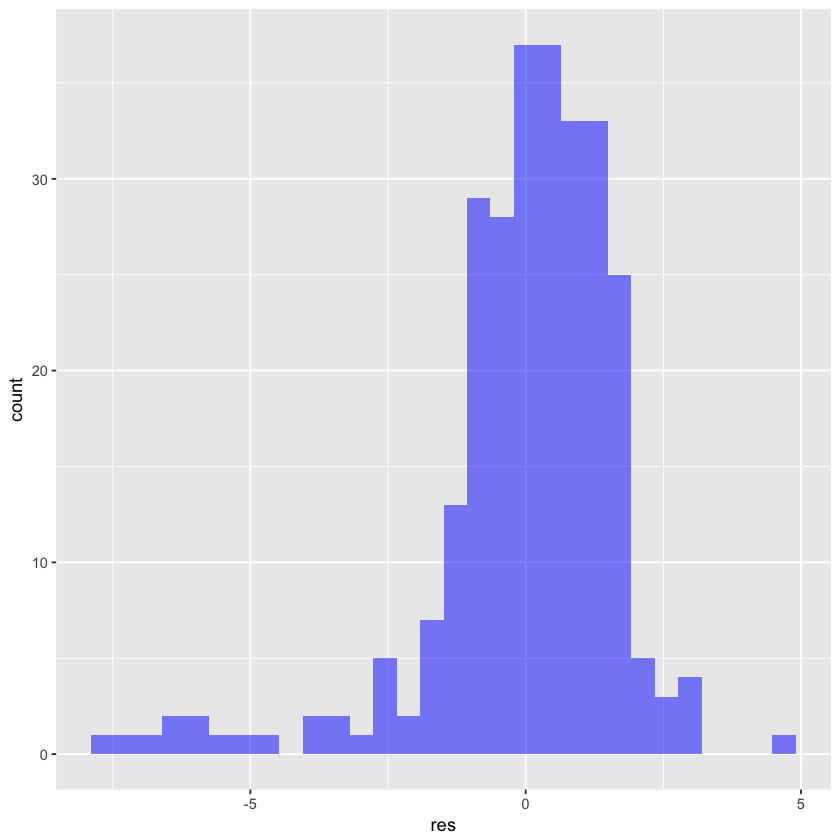

In [18]:
# Histogramm der Residuen
ggplot(res,aes(res)) + geom_histogram(fill="blue",alpha=0.5)

Sieht ganz so aus, als gäbe es einige verdächtige Werte für Residuen, die unter -5 liegen. Wir können dies genauer untersuchen, indem wir unser Modell plotten. Was diese Plots genau darstellen geht über diese Lektion hinaus. Das ISLR Buch gibt tolle Erklärungen dazu.

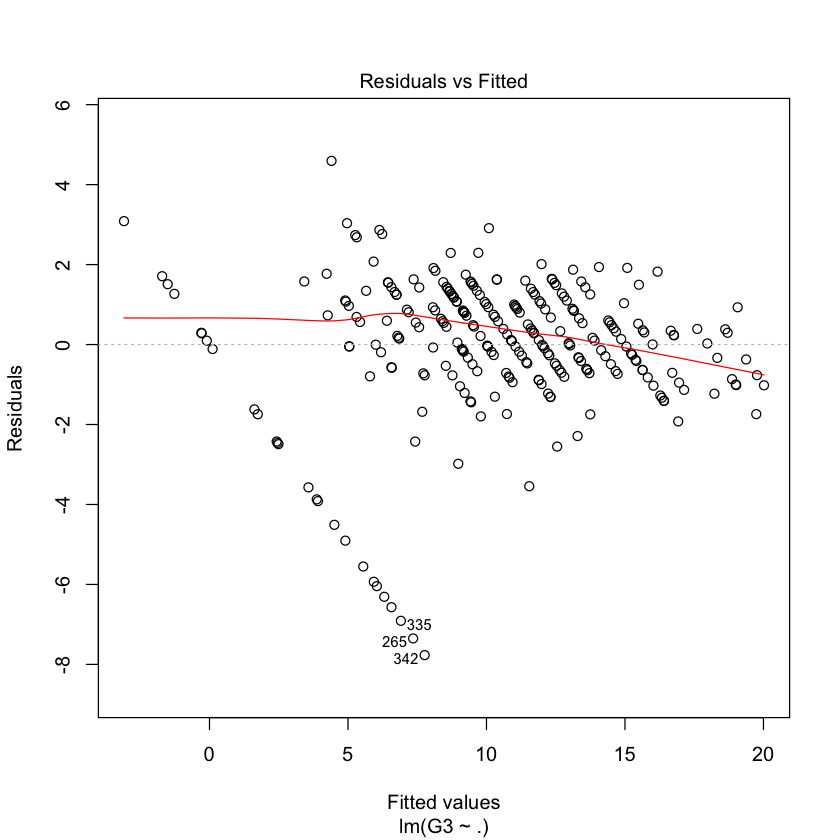

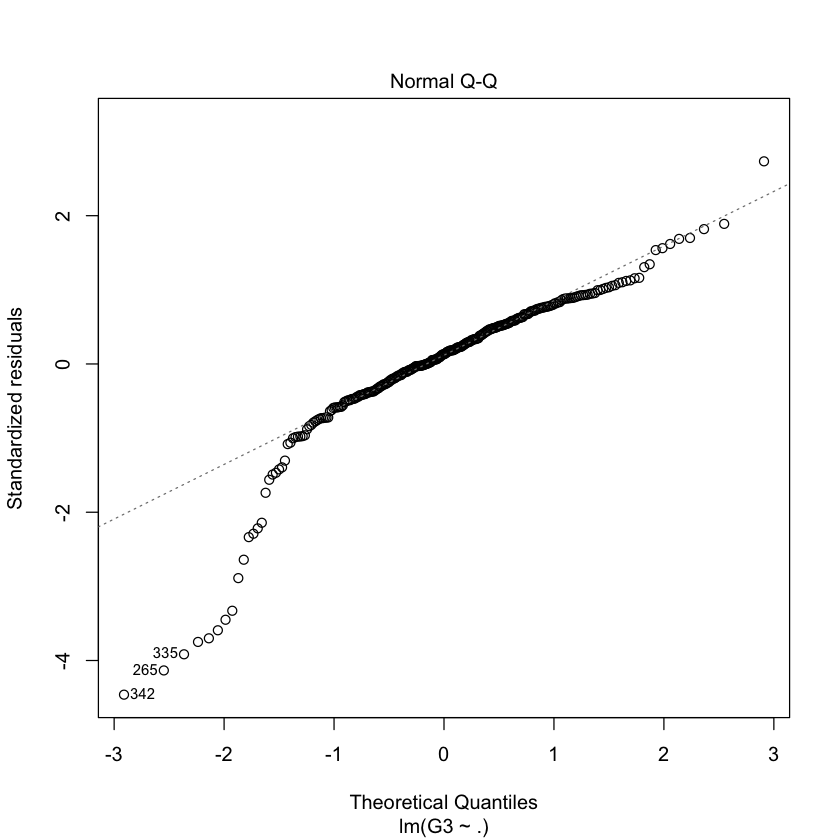

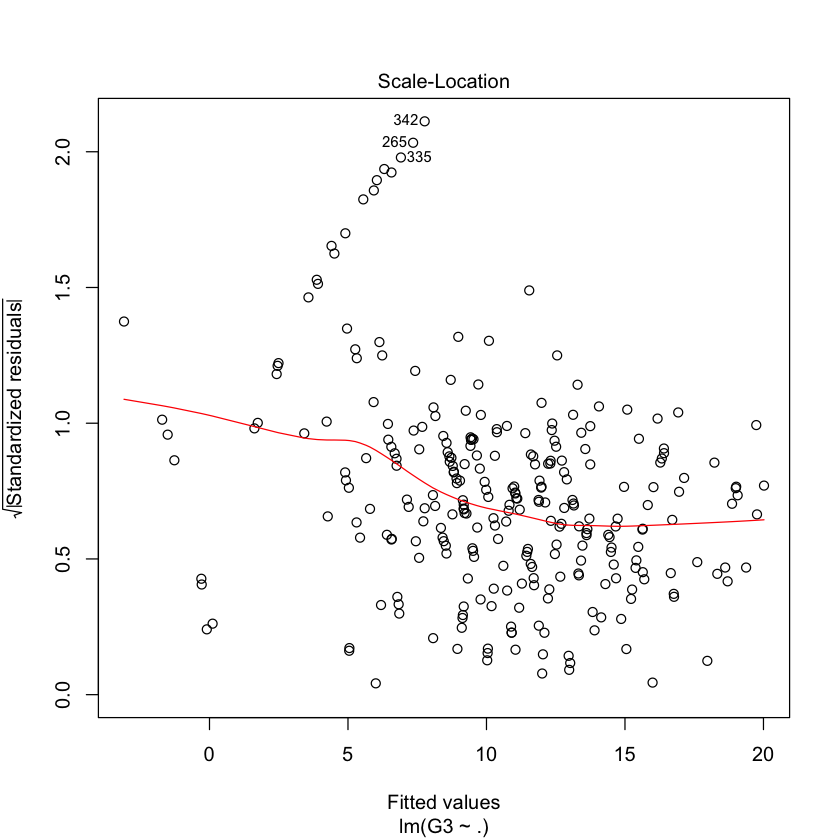

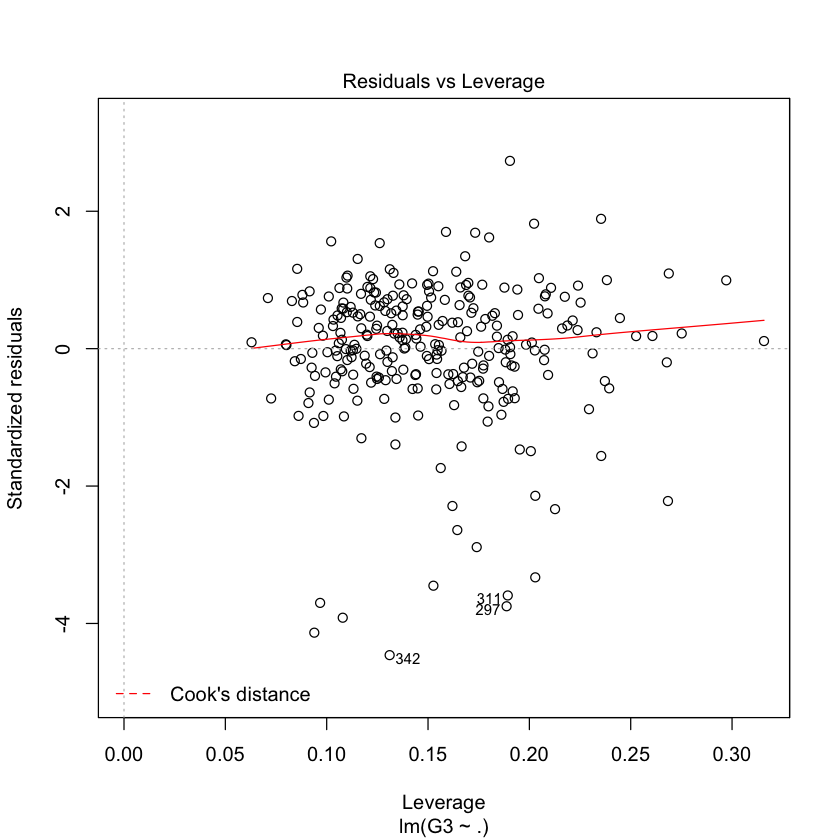

In [19]:
plot(model)

Das Fazit nachdem wir diese Plots gesehen haben ist, dass unser Modell teils negative Noten für die Studenten vorhersagt. Diese sollten wir alle auf 0 setzen, wenn wir unsere Ergebnisse gegen die Vorhersagen aufzeigen.

### Vorhersagen

Wir können unser Modell testen indem wir unsere Testdaten verwenden.

In [20]:
G3.predictions <- predict(model,test)

Jetzt können wir den *Root Mean Square Error*, ein standardisiertes Maß dafür, wie weit die vorhergesagten Werte daneben liegen:

In [21]:
results <- cbind(G3.predictions,test$G3) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

Lasst uns nun noch an den negativen Vorhersagen arbeiten. Dazu gibt es viele Möglichkeiten. Diese ist etwas komplexer, soll aber zeigen, wie man eine eigene Funktion schreiben kann, um mit so einem Problem umzugehen.

In [22]:
to_zero <- function(x){
    if  (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [23]:
results$pred <- sapply(results$pred,to_zero)

Zur Auswertung der vorhergesagten Werte gibt es viele Wege, wie z.B. den MSE (*mean squared error*):

In [24]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 4.411405


Oder dessen Wurzel:

In [26]:
mse^0.5

[1] 2.100335

Oder einfach die *R-Sqaured* Werte für unser Modell:

In [27]:
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$G3) - results$real)^2)

R2 = 1 - SSE/SST
R2

[1] 0.7779023

## Fazit

Du solltest dich jetzt wohl damit fühlen ein Modell für eine Lineare Regression in R aufzusetzen. Falls Teile der Mathematik, Statistik oder Grafiken für dich keinen Sinn ergeben haben hilft das ISLR Buch am besten weiter. Auch Wikipedia kann helfen. Letztlich gibt es keinen Ersatz dafür, sich die Erklärungen anzuschauen und zu verstehen.

Als nächstes gibt es eine Übung zu den linearen Regressionen.